# Week 2: Features
#### Design Thinking and Predictive Analytics for Data Products

This week we were introduced to the concept of features. You can think of features as variables. By definition, features are an individual measurable property or characteristic of a phenomenon being observed. It is important to to choose informative features to enable creating efficient algorithms for pattern recognition, classification, and modeling regression.

We then learned about building regressional models that incorporate features from different types of data. In this notebook, we will go over how to capture **categorical and temporal features** within linear regression models. Most questions will be focused on covering the conceptual material in the reading.

---
## Part 1: Categorical Features

Categorical features can be seen as equivalent to non-numerical data. This can include characteristics such as gender, color, race, etc. Incorporating categorical features into the building of regression models are helpful when analyzing correlation between such non-numerical characteristics. You could look into questions such as how height varies with gender, how product demand changes during different seasons, etc.

---

### The Data

Unzip the `BreastCancerData.csv` file in the Week 2 folder. This dataset contains detailed information about the diagnoses of breast masses found in women in Wisconsin. Ten features are calculated about each mass, including radius, smoothness, area, etc. In this portion of the notebook, we will be looking at how we can model the relationship between the radius of a mass and a diagnosis of whether the mass is benign or malignant.

### Reading the Data
Specify the path of the file. You may need to change the given path according to your local environment. This should be familiar if you took Course 1 (*Basic Data Ingestion, Processing, and Visualization*) of the Python Data Products specialization already.

In [34]:
# Process the data
import numpy
file = open("/Users/samruddhihande/Downloads/BreastCancerData.csv",'r')

dataset = []
header = file.readline().strip().split(',')
for line in file:
    line = line.split(',')
    dataset.append(line)
    
header

['"id"',
 '"diagnosis"',
 '"radius_mean"',
 '"texture_mean"',
 '"perimeter_mean"',
 '"area_mean"',
 '"smoothness_mean"',
 '"compactness_mean"',
 '"concavity_mean"',
 '"concave points_mean"',
 '"symmetry_mean"',
 '"fractal_dimension_mean"',
 '"radius_se"',
 '"texture_se"',
 '"perimeter_se"',
 '"area_se"',
 '"smoothness_se"',
 '"compactness_se"',
 '"concavity_se"',
 '"concave points_se"',
 '"symmetry_se"',
 '"fractal_dimension_se"',
 '"radius_worst"',
 '"texture_worst"',
 '"perimeter_worst"',
 '"area_worst"',
 '"smoothness_worst"',
 '"compactness_worst"',
 '"concavity_worst"',
 '"concave points_worst"',
 '"symmetry_worst"',
 '"fractal_dimension_worst"',
 '']

In [39]:
# Which column holds the radius mean, our predictor variable?
header.index('"radius_mean"')
print (header.index('"radius_mean"')) #This will print the header index.

# Which column holds the diagnosis, indicating whether the mass is benign or malignant?
header.index('"diagnosis"')

# When you run this cell, both indexes should show.

2


1

## Part 1a: Model Equation

In lecture, we created a model equation based on the example of height varying with gender. We had 4 values for gender: {"male", "female", "other", "not specified."} We represented gender with numerical values. 0 if "male", 1 if "female", 2 if "other", 3 if "not specified." Our equations were: 

$Height = 𝜃₀$ if male <br> 
$Height = 𝜃₀ + 𝜃₁$ if female <br>
$Height = 𝜃₀ + 𝜃₂$ if other <br>
$Height = 𝜃₀ + 𝜃₃$ if not specified <br>

In [42]:
# What would the model equations for what we are looking for? Assume 0 is "benign."

print("radius = 𝜃₀ if benign")
print("radius = 𝜃₀ + 𝜃₁ if malignant")

radius = 𝜃₀ if benign
radius = 𝜃₀ + 𝜃₁ if malignant


---
## Part 2: Temporal Features
Temporal features are variables that have to do with time. We can use them to look at patterns such as how sales vary over time, long term trends in sales, or short term trends such as weekly preferences.

### Data
Unzip the `temperature.csv` file in the Week 2 folder. This dataset contains hourly temperature data over the course of ~5 years from 36 different cities.

### Reading the Data
Specify the path of the file. You may need to change the given path according to your local environment. This should be familiar if you took Course 1 (*Basic Data Ingestion, Processing, and Visualization*) of the Python Data Products specialization already.

In [8]:
#Process the data
import numpy
file = open("/Users/samruddhihande/Downloads/temperature.csv",'r')

dataset = []
header = file.readline().strip().split(',')
for line in file:
    line = line.split(',')
    dataset.append(line)
    
header

['datetime',
 'Vancouver',
 'Portland',
 'San Francisco',
 'Seattle',
 'Los Angeles',
 'San Diego',
 'Las Vegas',
 'Phoenix',
 'Albuquerque',
 'Denver',
 'San Antonio',
 'Dallas',
 'Houston',
 'Kansas City',
 'Minneapolis',
 'Saint Louis',
 'Chicago',
 'Nashville',
 'Indianapolis',
 'Atlanta',
 'Detroit',
 'Jacksonville',
 'Charlotte',
 'Miami',
 'Pittsburgh',
 'Toronto',
 'Philadelphia',
 'New York',
 'Montreal',
 'Boston',
 'Beersheba',
 'Tel Aviv District',
 'Eilat',
 'Haifa',
 'Nahariyya',
 'Jerusalem']

In [9]:
#Just reviewing
# Which column holds the temperatures for Chicago?
header.index('Chicago')
print (header.index('Chicago')) #This will print the header index.

# Which column holds the temperatures for Eilat?
header.index('Eilat')

# When you run this cell, both indexes should show.

17


33

Q: Since we are looking at multiple years of data, what class of functions must be use to capture the flexible shape this data creates? <br>
*A: Piece-wise functions*

Q: Create a function for monthly temperature data. (Hint: Similar to the equation for monthly ratings over time) How would we list the feature vectors?

---

## Part 3: Missing Values

In this lecture, we learned about issues dealing with datasets that are missing values, and we looked at different strategies for dealing with those missing values.

So far we have been dealing with missing values by discarding those instances:

In [48]:
#Do you recall this method?
dataset = [d for d in dataset if d[5] != 'NA']

We covered three strategies for dealing with missing data:
1. **Filtering:** discarding missing values (above method)
2. **Missing data imputation:** filling in the missing values with "reasonable" estimates
3. **Modeling:** changing our regression/classification algorithms to handle missing data explicitly

## Part 3a: Missing Data Imputation

[Scikit learn: Imputation of Missing Values](https://scikit-learn.org/stable/modules/impute.html)

### The Data
Source: https://openmv.net/info/travel-times

Unzip the `travel-times.csv` file in the Week 2 folder. This dataset contains about the data for about 200 trips a driver took back and forth each day. He uses an app to track GPS coordinates which collects location and elevation data. Some examples of the data include date, start time, day of the week, direction of travel, distance, etc. 

### Reading the Data
Specify the path of the file. You may need to change the given path according to your local environment. This should be familiar if you took Course 1 (*Basic Data Ingestion, Processing, and Visualization*) of the Python Data Products specialization already.

In [1]:
import numpy
file = open("/Users/samruddhihande/Downloads/travel-times.csv", 'r')

dataset = []
header = file.readline().strip().split(',')
for line in file:
    line = line.split(',')
    dataset.append(line)
    
header

['Date',
 'StartTime',
 'DayOfWeek',
 'GoingTo',
 'Distance',
 'MaxSpeed',
 'AvgSpeed',
 'AvgMovingSpeed',
 'FuelEconomy',
 'TotalTime',
 'MovingTime',
 'Take407All',
 'Comments']

Open the `travel-times.csv` dataset and make observations about the dataset. You can also use the following method to view some of the data.

In [3]:
from pandas import read_csv
import numpy
dataset = read_csv('/Users/samruddhihande/Downloads/travel-times.csv', header=None)
# print the first 20 rows of data
print(dataset.head(20))

            0          1          2        3         4         5         6   \
0         Date  StartTime  DayOfWeek  GoingTo  Distance  MaxSpeed  AvgSpeed   
1     1/6/2012      16:37     Friday     Home     51.29     127.4      78.3   
2     1/6/2012      08:20     Friday      GSK     51.63     130.3      81.8   
3     1/4/2012      16:17  Wednesday     Home     51.27     127.4      82.0   
4     1/4/2012      07:53  Wednesday      GSK     49.17     132.3      74.2   
5     1/3/2012      18:57    Tuesday     Home     51.15     136.2      83.4   
6     1/3/2012      07:57    Tuesday      GSK     51.80     135.8      84.5   
7     1/2/2012      17:31     Monday     Home     51.37     123.2      82.9   
8     1/2/2012      07:34     Monday      GSK     49.01     128.3      77.5   
9   12/23/2011      08:01     Friday      GSK     52.91     130.3      80.9   
10  12/22/2011      17:19   Thursday     Home     51.17     122.3      70.6   
11  12/22/2011      08:16   Thursday      GSK     49

What do you notice about this dataset, specifically Columns 8 and 12? <br>
*You can see that there are missing values, indicated by NaN.*

If you'd like, you can use the scikit documentation link above to try out missing data imputation!

## Part 3b: Modeling Missing Data

Review Question: <br> 
In an earlier example, we had a male feature and a female feature. We represented this by writing:<br>
<center>feature=[1,0,0] for "female"</center>
<center>feature=[0,1,0] for "male"</center>
Q: Add an additional feature to indicate that a value is missing.<br>
*A: feature = [0,0,1] for "feature missing"*<br>
*Think about it:* What predicts does this model make under this scheme?

## Part 4: Feature Transformations

This portion of the homework is simply a review of the lecture reading.

Review Question:
When looking at weight vs height and using a polynomial equation to model this relationship, you can use the equation <center>$weight=𝜃₀+𝜃₁*height+𝜃₂*height^2+𝜃₃*height^3$</center> <br>
This equation still takes the form of $weight=𝜃*x$. <br>
Q: We need to use the feature vector. What would it be?

In [6]:
#Answer
print("x = [1, height, height^2, height^3]")

x = [1, height, height^2, height^3]


Q: Use the same approach to fit arbitrary functions.

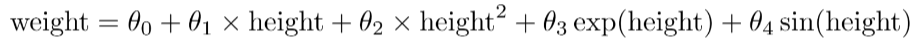

In [7]:
#Answer
from IPython.display import Image
Image("/Users/samruddhihande/Desktop/equation.png")

Restriction: Linear models do not support transformations such as       (https://imgur.com/a/kHP49uy). This is wher eyou would use alternative models that support nonlinear transformations such as neural networks.



---

## You're all done!
You should be familiar with what categorical and temporal data are and what to do when you are missing values. Try using what you know about regression and these types of features to run your own regressions! Perhaps try predicting a categorical value based on some numerical data, or analyze some type of data over time. Good luck!